# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - As imagens matricias são baseadas em matrizes e correspondência de valores

In [ ]:
# Verdadeiro

2 - O metódo np.sum() é responsável por realizar operações de multiplicação vetorial

In [ ]:
# Falso, o metodo np.sum() retorna um valor escalar e não um array.

3 - Histogramas devem ser utilizados para compreender imagens no grayscale

In [ ]:
# Verdadeiro

4 - Matrizes RGB pode ter de 3 à 4 tabelas

In [ ]:
# Verdadeiro

5 - HDR além de uma técnica é um espaço de cor

In [ ]:
# Falso, o HDR é uma técnica de captura de imagens que permite capturar uma faixa dinâmica mais ampla de luz.

# Parte prática

## Material de apoio

### Importações

```python
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```python
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```python
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 


Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$


Average: $\frac{R+G+B}{3}$


Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


RGB para CMY:
### <font color="red">R</font><font color="green">G</font><font color="blue">B</font> para <font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>
$$\begin{pmatrix}
    C \\ M \\ Y
\end{pmatrix} = \begin{pmatrix}
    1 \\ 1 \\ 1
\end{pmatrix} - \begin{pmatrix}
    R \\ G \\ B
\end{pmatrix} e \begin{pmatrix}
    R \\ G \\ B
\end{pmatrix} = \begin{pmatrix}
    1 \\ 1 \\ 1
\end{pmatrix} - \begin{pmatrix}
    C \\ M \\ Y
\end{pmatrix}$$
* **<font color="red">R</font>** + **<font color="cyan">C</font>** = 1 (ou 255);
* **<font color="green">G</font>** + **<font color="magenta">M</font>** = 1;
* **<font color="blue">B</font>** + **<font color="yellow">Y</font>** = 1.


Interpolação Bilinear:
Seja $I$ a imagem de entrada $L_{entrada}×C_{entrada}$ e $J$ a imagem de saída $L_{saída}×C_{saída}.$

Seja $s_L = L_{entrada}/L_{saída}$ e $s_C = C_{entrada}/C_{saída}.$

Seja $l_f = l \cdot s_L$ para $r=0,\ldots,R_{saída}-1$ e $c_f = c \cdot s_C$ para $c=0,\ldots,C_{saída}-1.$

Seja $r_0 = \lfloor{l_f}\rfloor$ e $c=\lfloor{c_f}\rfloor.$

Seja $\Delta_l = l_f - l_0$ e $\Delta_c = c_f - c_0.$

Então $J(l, c)$
$$=I(l_0, c_0) \cdot (1-\Delta_l) \cdot (1-\Delta_c)$$
$$+I(l_0+1, c_0) \cdot \Delta_l \cdot (1-\Delta_c)$$
$$+I(l_0, c_0+1) \cdot (1-\Delta_l) \cdot \Delta_c$$
$$+I(l_0+1, c_0+1) \cdot \Delta_l \cdot \Delta_c.$$

### Escalonamento com nearest neighbor

```python
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```
### Escalonamento clássico
```python
scale_x, scale_y = 2, 2
mario_scale = np.zeros(shape=(l * scale_y, c * scale_x, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = np.round(j * scale_x)
        new_y = np.round(i * scale_y)
        mario_scale[new_y, new_x] = mario[i, j]

plt.imshow(mario_scale)
Image.fromarray(mario_scale).save('mario_scale.png')
```

### Cisalhamento

```python
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

```python
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```
### Blending com escala genérica

```python
imagem_blending = (C * img_1) + ((1 - C) * img_2)
imagem_blending = imagem_blending.astype(np.uint8)
```

### Histograma
```python
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

```
### Espelhamento
```python
refl = np.zeros(shape=example.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        refl[new_y, new_x] = example[i, j]

plt.imshow(refl)
```


No outro eixo

```python
refl = np.zeros(shape=example.shape, dtype=np.uint8)
refl[::-1, ::1] = example
plt.imshow(refl)
```

**1 -** Importe as bibliotecas que serão usadas

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

**2 -** Abra as imagens techno.jpg, Shrine.jpg, Ninja.jpg, estacionamento1.png e estacionamento2.png, retire o canal alpha se necessário, exiba essas imagens e mostre o formato (shape) de cada uma

In [4]:
techno = np.array(Image.open("techno.jpg").convert("RGB"))
shrine = np.array(Image.open("shrine.jpg").convert("RGB"))
ninja = np.array(Image.open("ninja.jpg").convert("RGB"))
estacionamento1 = np.array(Image.open("estacionamento1.png").convert("RGB"))[:, :, :3]
estacionamento2 = np.array(Image.open("estacionamento2.png").convert("RGB"))[:, :, :3]

print("Shape das imagens:", techno.shape, shrine.shape, ninja.shape, estacionamento1.shape, estacionamento2.shape)


Shape das imagens: (500, 500, 3) (500, 500, 3) (250, 250, 3) (1439, 2559, 3) (1439, 2559, 3)


**3 -** Faça o cisalhamento na imagem Techno, considere cx>cy.

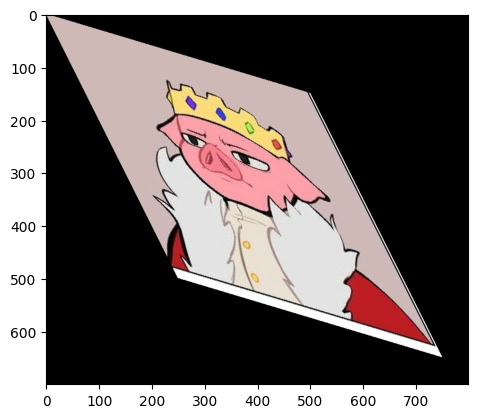

In [5]:
# Faça o cisalhamento na imagem Techno, considere cx>cy.
def cisalhamento(img, cx, cy):
    (l, c, p) = img.shape
    img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)

    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)
            new_y = int(cy * j + i)

            if 0 <= new_x < img_shear.shape[1] and 0 <= new_y < img_shear.shape[0]:
                img_shear[new_y, new_x] = img[i, j]

    plt.imshow(img_shear)
    plt.show()

cisalhamento(techno, 0.5, 0.3)

**4 -** Apresente o Histograma da imagem anterior. Mostre o resultado

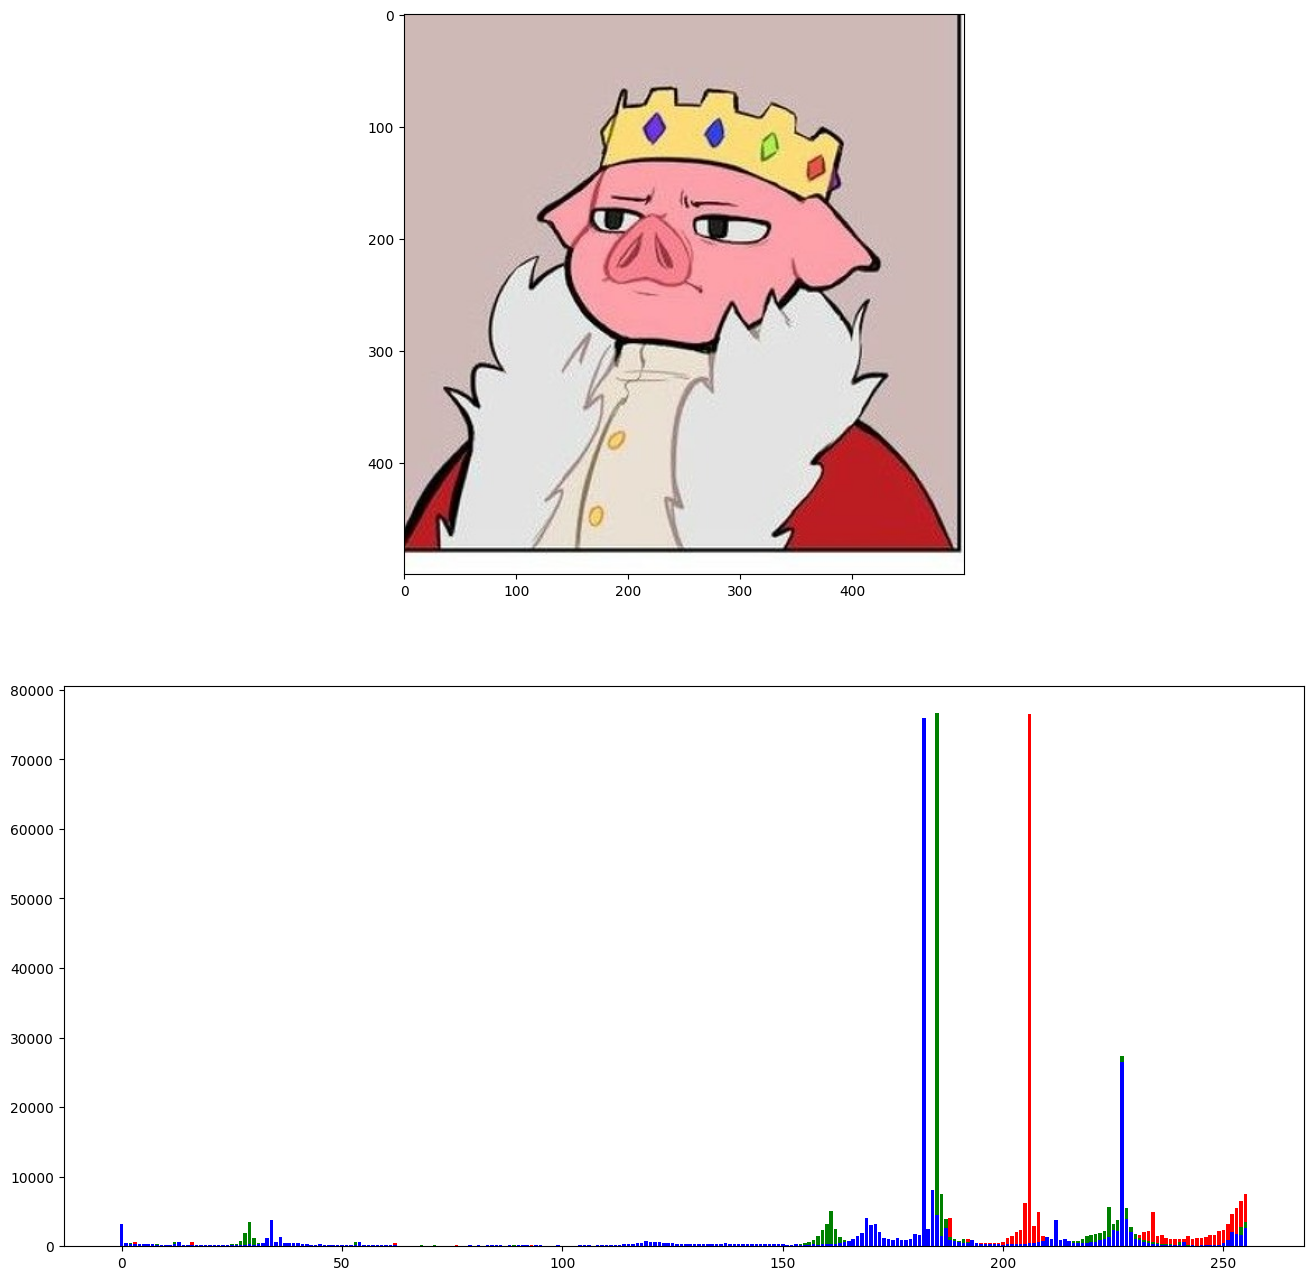

In [6]:
# Apresente o histograma da imagem anterior. Mostre o resultado
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1

    return histogram


def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])

    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color="red")
    plt.bar(range(256), histogram_g, color="green")
    plt.bar(range(256), histogram_b, color="blue")


show_histogram(techno)

**5 -** Aplique o metodo **luminosity** na imagem Ninja. Mostre o resultado

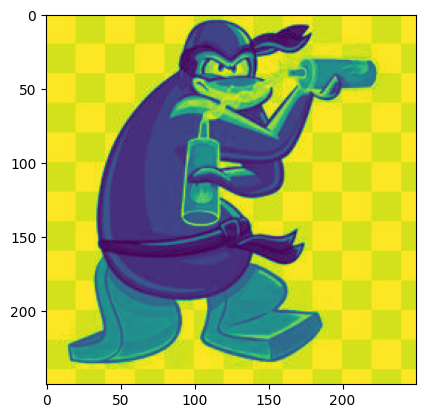

In [63]:
(l, c, p) = ninja.shape
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(ninja[i, j, 0])
        g = float(ninja[i, j, 1])
        b = float(ninja[i, j, 2])
        
        img_avg[i, j] = (np.max([r, g, b]) + np.min([r, g, b])) / 2
    
plt.imshow(img_avg)

**6 -** Aplique a detecção de movimento entre os estacionamentos. Mostre o resultado (Dica: Lembre de usar .astype(np.int16))

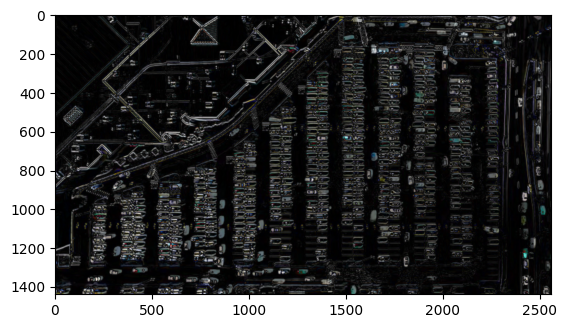

In [73]:
def detect_motion(img1, img2):
    (l, c, p) = img1.shape
    diff = np.zeros((l, c, p), dtype=np.int16)

    for i in range(l):
        for j in range(c):
            for k in range(p):
                diff[i, j, k] = np.abs(int(img1[i, j, k]) - int(img2[i, j, k]))

    return diff

motion = detect_motion(estacionamento1, estacionamento2)
plt.imshow(motion.astype(np.uint16))

**7 -** Crie uma função para aplicar o espelhamento no eixo desejado, podendo ser X e/ou Y, o usuário deve poder escolher.

In [80]:
def reflection(img):
    refl = np.zeros(shape=img.shape, dtype=np.uint8)
    (l, c, p) = img.shape
    for i in range(l):
        for j in range(c):
            new_x = -j
            new_y = i
            refl[new_y, new_x] = img[i, j]

    plt.imshow(refl)

**8 -** Aplique a imagem da **questão 6 à função feita na questão 7**. Mostre o resultado

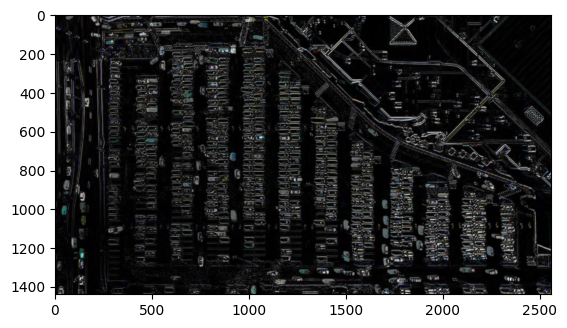

In [109]:
img = reflection(motion)

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [8]:
img.save("resultado.jpg")

NameError: name 'img' is not defined

# Lembre de entregar tudo como um arquivo ZIP, com o arquivo resultado e seu notebook